In [51]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
# define filenames and their directories

directory = '../../../../Documents/ModellingData'



LIG models:
- CESM2 -> a1 = lig127k, b1 = piControl
- FGOALS-f3-L -> a2 = lig127k, b2 = piControl --> piControl run has no AMOC: Chris said to use parts of historical run as proxy
- GISS-E2-1-G -> a3 = lig127k, b3 = piControl
- IPSL-CM6A-LR -> a4 = lig127k, b4 = piControl

In [39]:
# CESM2 LIG -> a1

filename_a1 = '%s/CESM2_lig127k.cvdp_data.1-700.nc'%directory

# load files via xarray

expt_a1_file = xr.open_dataset(filename_a1,decode_times=False)

lat_a1 = expt_a1_file['lat']
lat_amoc_a1 = expt_a1_file['lat_amoc']
lon_a1 = expt_a1_file['lon']
depth_a1 = expt_a1_file['lev']
amoc_mean_ann_a1 = expt_a1_file['amoc_mean_ann']

In [6]:
# CESM piControl -> b1

filename_b1 = '%s/CESM2_piControl.cvdp_data.701-1200.nc'%directory

# load files via xarray

expt_b1_file = xr.open_dataset(filename_b1,decode_times=False)

lat_b1 = expt_b1_file['lat_amoc']
lon_b1 = expt_b1_file['lon']
depth_b1 = expt_b1_file['lev']
amoc_mean_ann_b1 = expt_b1_file['amoc_mean_ann']

In [7]:
# FGOALS-f3-L LIG -> a2

filename_a2 = '%s/FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc'%directory

# load files via xarray

expt_a2_file = xr.open_dataset(filename_a2,decode_times=False)

lat_a2 = expt_a2_file['lat_amoc']
lon_a2 = expt_a2_file['lon']
depth_a2 = expt_a2_file['lev']
amoc_mean_ann_a2 = expt_a2_file['amoc_mean_ann']

In [8]:
# GISS-E2-1-G LIG -> a3

filename_a3 = '%s/GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc'%directory

# load files via xarray

expt_a3_file = xr.open_dataset(filename_a3,decode_times=False)

lat_a3 = expt_a3_file['lat_amoc']
lon_a3 = expt_a3_file['lon']
depth_a3 = expt_a3_file['lev']
amoc_mean_ann_a3 = expt_a3_file['amoc_mean_ann']

In [9]:
# GISS-E2-1-G piControl -> b3

filename_b3 = '%s/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'%directory

# load files via xarray

expt_b3_file = xr.open_dataset(filename_b3,decode_times=False)

lat_b3 = expt_b3_file['lat_amoc']
lon_b3 = expt_b3_file['lon']
depth_b3 = expt_b3_file['lev']
amoc_mean_ann_b3 = expt_b3_file['amoc_mean_ann']

In [10]:
# IPSL-CM6A-LR LIG -> a4

filename_a4 = '%s/IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc'%directory

# load files via xarray

expt_a4_file = xr.open_dataset(filename_a4,decode_times=False)

lat_a4 = expt_a4_file['lat_amoc']
lon_a4 = expt_a4_file['lon']
depth_a4 = expt_a4_file['lev']
amoc_mean_ann_a4 = expt_a4_file['amoc_mean_ann']

In [11]:
# IPSL-CM6A-LR piControl -> b4

filename_b4 = '%s/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'%directory

# load files via xarray

expt_b4_file = xr.open_dataset(filename_b4,decode_times=False)

lat_b4 = expt_b4_file['lat_amoc']
lon_b4 = expt_b4_file['lon']
depth_b4 = expt_b4_file['lev']
amoc_mean_ann_b4 = expt_b4_file['amoc_mean_ann']

(-30.0, 90.0)

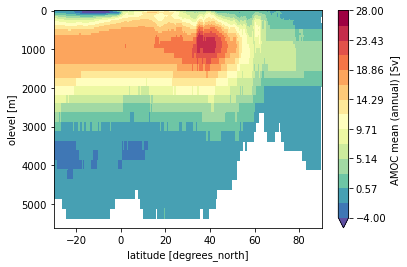

In [12]:
amoc_mean_ann_a1.plot(yincrease = False, levels = 15, cmap = 'Spectral_r', vmin = -4, vmax = 28)
ax = plt.gca()
ax.set_xlim([-30,90])

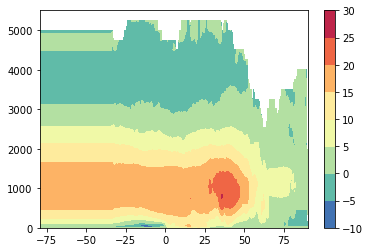

In [48]:
plt.contourf(lat_amoc_a1, depth_a1, amoc_mean_ann_a1, cmap = 'Spectral_r')
plt.colorbar()

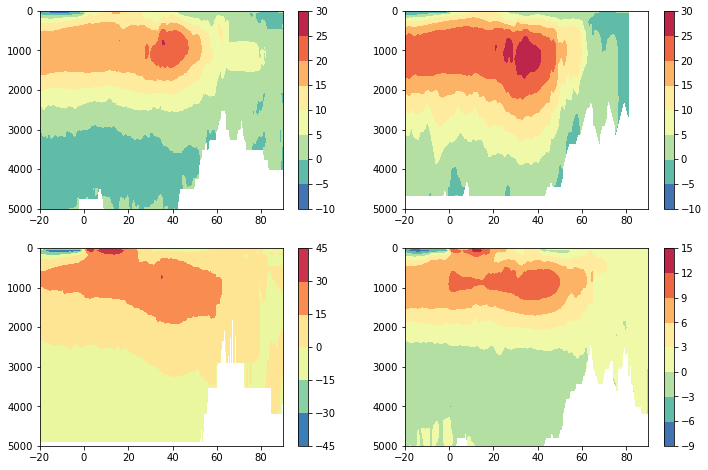

In [88]:
fig = plt.figure(figsize = (12, 8))
gs = mpl.gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
cont1 = ax1.contourf(lat_amoc_a1, depth_a1, amoc_mean_ann_a1, cmap = 'Spectral_r')
ax1.set_xlim(-20, 90)
ax1.set_ylim(0, 5000)
ax1.invert_yaxis()
plt.colorbar(cont1, ax=ax1)
cont2 = ax2.contourf(lat_a2, depth_a2, amoc_mean_ann_a2, cmap = 'Spectral_r')
ax2.set_xlim(-20, 90)
ax2.set_ylim(0, 5000)
ax2.invert_yaxis()
cont3 = ax3.contourf(lat_a3, depth_a3, amoc_mean_ann_a3, cmap = 'Spectral_r')
ax3.set_xlim(-20, 90)
ax3.set_ylim(0, 5000)
ax3.invert_yaxis()
cont4 = ax4.contourf(lat_a4, depth_a4, amoc_mean_ann_a4, cmap = 'Spectral_r')
ax4.set_xlim(-20, 90)
ax4.set_ylim(0, 5000)
ax4.invert_yaxis()

plt.colorbar(cont2, ax=ax2)
plt.colorbar(cont3, ax=ax3)
plt.colorbar(cont4, ax=ax4)

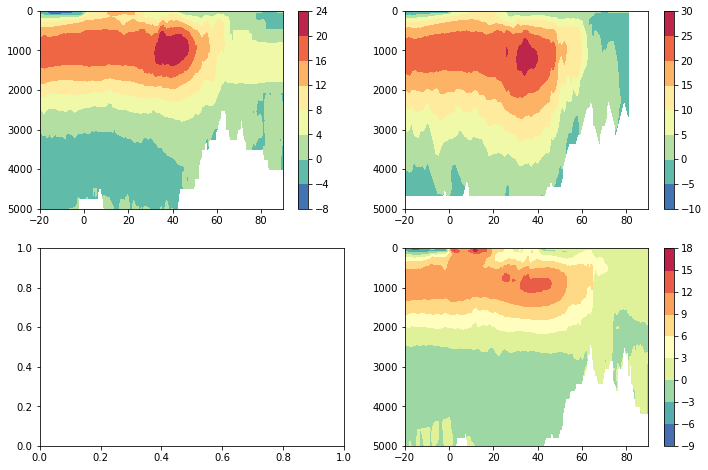

In [89]:
fig = plt.figure(figsize = (12, 8))
gs = mpl.gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
cont1 = ax1.contourf(lat_b1, depth_b1, amoc_mean_ann_b1, cmap = 'Spectral_r')
ax1.set_xlim(-20, 90)
ax1.set_ylim(0, 5000)
ax1.invert_yaxis()
#cont2 = ax2.contourf(lat_b2, depth_b2, amoc_mean_ann_b2, cmap = 'Spectral_r')
#ax2.set_xlim(-20, 90)
#ax2.set_ylim(0, 5000)
#ax2.invert_yaxis()
cont3 = ax3.contourf(lat_b3, depth_b3, amoc_mean_ann_b3, cmap = 'Spectral_r')
ax3.set_xlim(-20, 90)
ax3.set_ylim(0, 5000)
ax3.invert_yaxis()
cont4 = ax4.contourf(lat_b4, depth_b4, amoc_mean_ann_b4, cmap = 'Spectral_r')
ax4.set_xlim(-20, 90)
ax4.set_ylim(0, 5000)
ax4.invert_yaxis()
plt.colorbar(cont1, ax=ax1)
#plt.colorbar(cont2, ax=ax2)
plt.colorbar(cont3, ax=ax3)
plt.colorbar(cont4, ax=ax4)

In [92]:
#streamfunction differences between LIG and piControl -> LIG - piControl

streamfunction_CESM = amoc_mean_ann_a1 - amoc_mean_ann_b1
streamfunction_GISS = amoc_mean_ann_a3 - amoc_mean_ann_b3
streamfunction_IPSL = amoc_mean_ann_a4 - amoc_mean_ann_b4

(-30.0, 90.0)

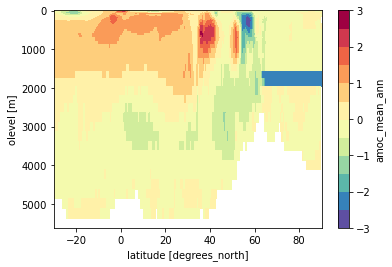

In [94]:
streamfunction_CESM.plot(yincrease = False, levels = 15, cmap = 'Spectral_r')
ax = plt.gca()
ax.set_xlim([-30,90])

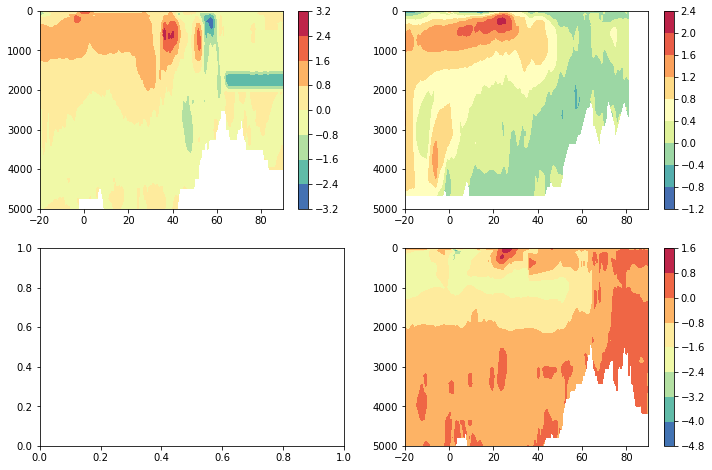

In [93]:
fig = plt.figure(figsize = (12, 8))
gs = mpl.gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
cont1 = ax1.contourf(lat_b1, depth_b1, streamfunction_CESM, cmap = 'Spectral_r')
ax1.set_xlim(-20, 90)
ax1.set_ylim(0, 5000)
ax1.invert_yaxis()
#cont2 = ax2.contourf(lat_b2, depth_b2, amoc_mean_ann_b2, cmap = 'Spectral_r')
#ax2.set_xlim(-20, 90)
#ax2.set_ylim(0, 5000)
#ax2.invert_yaxis()
cont3 = ax3.contourf(lat_b3, depth_b3, streamfunction_GISS, cmap = 'Spectral_r')
ax3.set_xlim(-20, 90)
ax3.set_ylim(0, 5000)
ax3.invert_yaxis()
cont4 = ax4.contourf(lat_b4, depth_b4, streamfunction_IPSL, cmap = 'Spectral_r')
ax4.set_xlim(-20, 90)
ax4.set_ylim(0, 5000)
ax4.invert_yaxis()
plt.colorbar(cont1, ax=ax1)
#plt.colorbar(cont2, ax=ax2)
plt.colorbar(cont3, ax=ax3)
plt.colorbar(cont4, ax=ax4)